In [2]:
%matplotlib inline
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
import torchvision
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torchvision import models
import os
from torchvision import datasets, models, transforms

from torch.autograd import Variable

import sys
sys.path.append("..") 
import d2lzh_pytorch as d2l

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [3]:
# 预处理
# 指定RGB三个通道的均值和方差来将图像通道归一化
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
test_augs = transforms.Compose([
        transforms.Resize(size=256),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        normalize
    ])

In [4]:
pwd

'D:\\360downloads\\毕业论文\\pytorch'

In [5]:
data_dir = './test_database'
os.listdir(os.path.join(data_dir, "hotdog")) # ['train', 'test']

['train']

In [6]:
train_imgs = ImageFolder(os.path.join(data_dir, 'hotdog/train'))
train_imgs

Dataset ImageFolder
    Number of datapoints: 260
    Root Location: ./test_database\hotdog/train
    Transforms (if any): None
    Target Transforms (if any): None

In [7]:
data_dir = './database'
test_iter = DataLoader(ImageFolder(os.path.join(data_dir, 'hotdog/train'), transform=test_augs),
                            batch_size = 1, shuffle=True)

In [8]:
pretrained_net = models.resnet18(pretrained=True)
pretrained_net.fc = nn.Linear(512, 2)
PATH = "./my_model/hotdog_fine-tune.pt"
pretrained_net.load_state_dict(torch.load(PATH))
pretrained_net = pretrained_net.eval()

In [9]:
# pretrained_net

In [10]:
# pretrained_net.fc.parameters()

In [11]:
data_dir = './database'
test_iter = DataLoader(ImageFolder(os.path.join(data_dir, 'hotdog/train'), transform=test_augs),
                            batch_size = 1, shuffle=True)
test_acc_sum, n = 0.0, 0
# 输入
pretrained_net = pretrained_net.to(device)

i = 5
for X, y in test_iter:
    if(i == 0):
        break
    X = X.to(device)
    y = y.to(device)
    y_hat = pretrained_net(X)
    print(y_hat)
#     print("预测:",y_hat.argmax(dim=1))
#     print("标签:",y)
#     print(y_hat.shape)
#     print(y)
    test_acc_sum += (y_hat.argmax(dim=1) == y).sum().cpu().item()
    i = i-1
#     print(y.shape)
    n += y.shape[0]
print(test_acc_sum / n)

tensor([[ 5.6328, -5.2088]], device='cuda:0', grad_fn=<AddmmBackward>)
tensor([[ 10.9124, -11.3207]], device='cuda:0', grad_fn=<AddmmBackward>)
tensor([[-5.0996,  4.8077]], device='cuda:0', grad_fn=<AddmmBackward>)
tensor([[ 6.5515, -7.3525]], device='cuda:0', grad_fn=<AddmmBackward>)
tensor([[-10.2562,  10.7103]], device='cuda:0', grad_fn=<AddmmBackward>)
1.0


## 读取一张图片并预处理

In [12]:
img_path = 'database/hotdog/train/hotdog/785.png'
def load_query_image(img_path):
    test_augs = transforms.Compose([
            transforms.Resize(size=256),
            transforms.CenterCrop(size=224),
            transforms.ToTensor(),
            normalize
        ])
    query_image = datasets.folder.default_loader(img_path)
    query_image = test_augs(query_image)
    query_image = query_image.view(-1,3,224,224) # 3,224,224 是预设的 要输入给网络的
    return query_image

In [13]:
query_image = load_query_image(img_path)

In [14]:
# query_image = query_image.view(-1,3,224,224) # 3,224,224 是预设的 要输入给网络的

In [15]:
query_image.shape

torch.Size([1, 3, 224, 224])

In [16]:
query_image = query_image.to(device)

In [17]:
output = pretrained_net(query_image)

In [18]:
output

tensor([[ 5.2268, -5.2144]], device='cuda:0', grad_fn=<AddmmBackward>)

In [19]:
pretrained_net = pretrained_net.to('cpu')
# remove the final fc layer
pretrained_net.fc = nn.Sequential()

In [20]:
pretrained_net

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

In [21]:
pretrained_net = pretrained_net.to(device)
output_test = pretrained_net(query_image)

In [22]:
output_test.shape

torch.Size([1, 512])

In [23]:
img2_path = 'database/hotdog/test/hotdog/1001.png' # hotdog
img3_path = 'database/hotdog/test/not-hotdog/1012.png' # not hotdog
img4_path = 'database/hotdog/test/not-hotdog/1065.png' # not hotdog 这个非常不像
img2 = load_query_image(img2_path)
img3 = load_query_image(img3_path)
img4 = load_query_image(img4_path)

In [24]:
img2 = img2.to(device)
output_test2 = pretrained_net(img2)
img3 = img3.to(device)
output_test3 = pretrained_net(img3)
img4 = img4.to(device)
output_test4 = pretrained_net(img4)

In [25]:
output_test2.shape, output_test3.shape, output_test4.shape

(torch.Size([1, 512]), torch.Size([1, 512]), torch.Size([1, 512]))

In [26]:
# 打平
output_test = output_test.view(512)
output_test2 = output_test2.view(512)
output_test3 = output_test3.view(512)
output_test4 = output_test4.view(512)

output_test = output_test.data.cpu()
output_test2 = output_test2.data.cpu()
output_test3 = output_test3.data.cpu()
output_test4 = output_test4.data.cpu()

In [27]:
# 相似度
out1 = (output_test*output_test2)/(torch.norm(output_test,p=2,dim=0, keepdim=True)*torch.norm(output_test2,p=2,dim=0, keepdim=True))
out2 = (output_test*output_test3)/(torch.norm(output_test,p=2,dim=0, keepdim=True)*torch.norm(output_test3,p=2,dim=0, keepdim=True))
out3 = (output_test*output_test4)/(torch.norm(output_test,p=2,dim=0, keepdim=True)*torch.norm(output_test4,p=2,dim=0, keepdim=True))
dif_3_4 = (output_test3*output_test4)/(torch.norm(output_test4,p=2,dim=0, keepdim=True)*torch.norm(output_test3,p=2,dim=0, keepdim=True))

In [28]:
out1.sum(), out2.sum(), out3.sum(), dif_3_4.sum()

(tensor(0.6120), tensor(0.4597), tensor(0.5078), tensor(0.4943))

## 封装距离比较函数

In [29]:
def similarity_of_two(img1, img2):
    # 加载到gpu
    img1 = img1.to(device)
    img2 = img2.to(device)
    # 提取特征（1,3,224,224）=> (1,512)
    output_img1 = pretrained_net(img1)
    output_img2 = pretrained_net(img2)
    # (1,512) => (512)
    output_img1 = output_img1.view(512)
    output_img2 = output_img2.view(512)
    output_img1 = output_img1.data.cpu()
    output_img2 = output_img2.data.cpu()
    out = (output_img1*output_img2)/(torch.norm(output_img1,p=2,dim=0, keepdim=True)*torch.norm(output_img2,p=2,dim=0, keepdim=True))
    return out.sum()

In [30]:
out = similarity_of_two(img2, img3)
out

tensor(0.5921)

In [81]:
banana1_path = 'database/hotdog/test/not-hotdog/1148.png'
banana2_path = 'database/hotdog/test/not-hotdog/1132.png'
hotdog1_path = 'database/hotdog/test/hotdog/1198.png'
banana1 = load_query_image(banana1_path)
banana2 = load_query_image(banana2_path)
hotdog1 = load_query_image(hotdog1_path)
similarity_bb = similarity_of_two(banana1, banana2)
similarity_bh = similarity_of_two(banana1, hotdog1)

In [82]:
similarity_bb, similarity_bh

(tensor(0.6472), tensor(0.5143))

In [83]:
banana1

tensor([[[[-1.4672, -1.4843, -1.5014,  ...,  0.7248,  0.7419,  0.7419],
          [-1.4500, -1.4672, -1.5014,  ...,  0.7248,  0.7419,  0.7591],
          [-1.4158, -1.4329, -1.4843,  ...,  0.7419,  0.7591,  0.7762],
          ...,
          [ 0.8276,  0.8618,  0.8961,  ...,  0.6734,  0.7591,  0.8104],
          [ 0.8276,  0.8447,  0.8961,  ...,  0.6734,  0.7591,  0.8104],
          [ 0.8276,  0.8618,  0.8961,  ...,  0.6734,  0.7591,  0.8104]],

         [[-1.5630, -1.5805, -1.5805,  ...,  0.4328,  0.4503,  0.4503],
          [-1.5805, -1.5980, -1.5980,  ...,  0.4328,  0.4503,  0.4678],
          [-1.5630, -1.5805, -1.5980,  ...,  0.4503,  0.4678,  0.4853],
          ...,
          [ 0.3978,  0.4328,  0.4678,  ...,  0.2927,  0.3627,  0.4153],
          [ 0.3803,  0.4153,  0.4678,  ...,  0.2927,  0.3627,  0.4153],
          [ 0.3803,  0.4153,  0.4503,  ...,  0.2927,  0.3627,  0.4153]],

         [[-1.3513, -1.3513, -1.3861,  ..., -0.4624, -0.4450, -0.4450],
          [-1.3164, -1.2990, -

In [84]:
query_image = datasets.folder.default_loader(banana1_path)
query_image2 = datasets.folder.default_loader(banana2_path)
query_image3 = datasets.folder.default_loader(hotdog1_path)
# query_image = test_augs(query_image)hotdog1_path

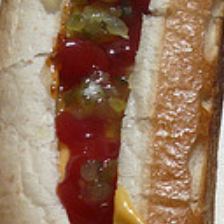

In [85]:
transform = transforms.Compose([
            transforms.Resize(size=256),
            transforms.CenterCrop(size=224)
             ])
query_image3 = transform(query_image3)
query_image3

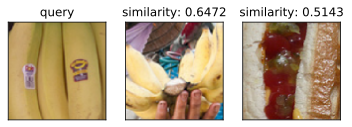

In [87]:
import matplotlib.pyplot as plt
transform = transforms.Compose([
            transforms.Resize(size=256),
            transforms.CenterCrop(size=224)
             ])
X = []
X.append(transform(query_image))
X.append(transform(query_image2))
X.append(transform(query_image3))
scores = ['query','similarity: 0.6472','similarity: 0.5143']
d2l.use_svg_display()
# 这里的_表示我们忽略（不使用）的变量
_, axes = plt.subplots(nrows = 1, ncols = 3)
#     for f, img, lbl in zip(figs, images, labels):
for i in range(3):
    axes[i].imshow(X[i])
    axes[i].set_title(scores[i])
    axes[i].axes.get_xaxis().set_visible(False)
    axes[i].axes.get_yaxis().set_visible(False)
plt.show()

# 封装整理

In [ ]:
# 读取一张图片并预处理
img_path = 'database/hotdog/train/hotdog/785.png'
def load_query_image(img_path):
    test_augs = transforms.Compose([
            transforms.Resize(size=256),
            transforms.CenterCrop(size=224),
            transforms.ToTensor(),
            normalize
        ])
    query_image = datasets.folder.default_loader(img_path)
    query_image = test_augs(query_image)
    query_image = query_image.view(-1,3,224,224) # 3,224,224 是预设的 要输入给网络的
    return query_image

In [ ]:
# 封装距离比较函数
def similarity_of_two(img1, img2):
    # 加载到gpu
    img1 = img1.to(device)
    img2 = img2.to(device)
    # 提取特征（1,3,224,224）=> (1,512)
    output_img1 = pretrained_net(img1)
    output_img2 = pretrained_net(img2)
    # (1,512) => (512)
    output_img1 = output_img1.view(512)
    output_img2 = output_img2.view(512)
    output_img1 = output_img1.data.cpu()
    output_img2 = output_img2.data.cpu()
    out = (output_img1*output_img2)/(torch.norm(output_img1,p=2,dim=0, keepdim=True)*torch.norm(output_img2,p=2,dim=0, keepdim=True))
    return out.sum()